##      1. Importing the Libraries

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 2. Data collection and Analysis

    loading the diabetes dataset

In [73]:
data = pd.read_csv(r"C:\Users\vijayram\Data Science Intern\diabetes.csv")

    Printing the first 5 rows

In [74]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [75]:
data.shape

(768, 9)

In [76]:
# dataset contains 768 rows and 8 columns

    Provides the Statistical Information

In [77]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


    Checking for Null Values

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


    Checking for Number of Null values

In [79]:
data.isna().sum()
# There are no Null Values in the dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

    Checking for number of Duplicate Values

In [80]:
data.duplicated().sum()

0

In [81]:
# There are no Duplicates values in the datasat

## 3. Data Visualization

    Countplot

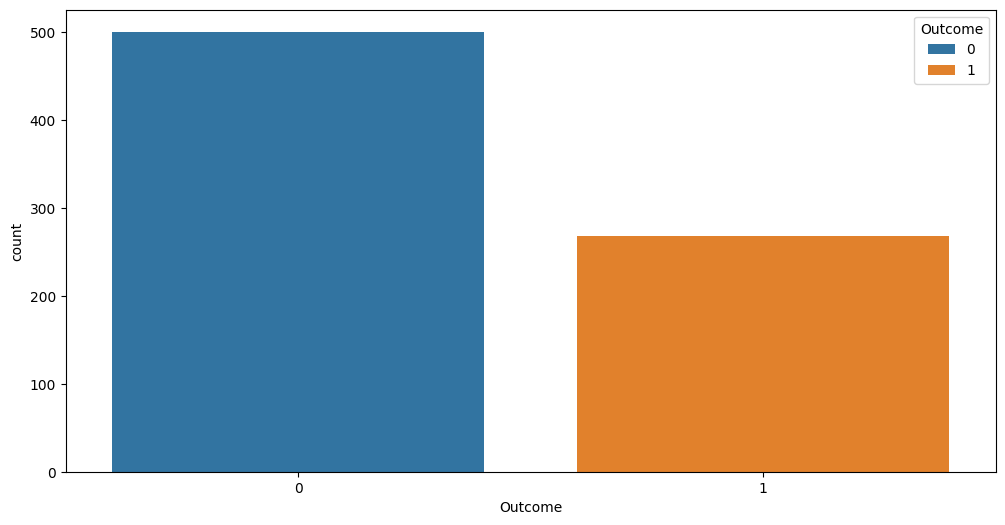

In [82]:
%matplotlib inline
plt.figure(figsize = (12,6))
sns.countplot(x = 'Outcome', data = data, hue = 'Outcome')
plt.show()

In [83]:
data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [84]:
# The above graph interprets that out of 728 records there are 500 non diabetic and 268 diabetic patients

    Box plot

         Checking for outliers

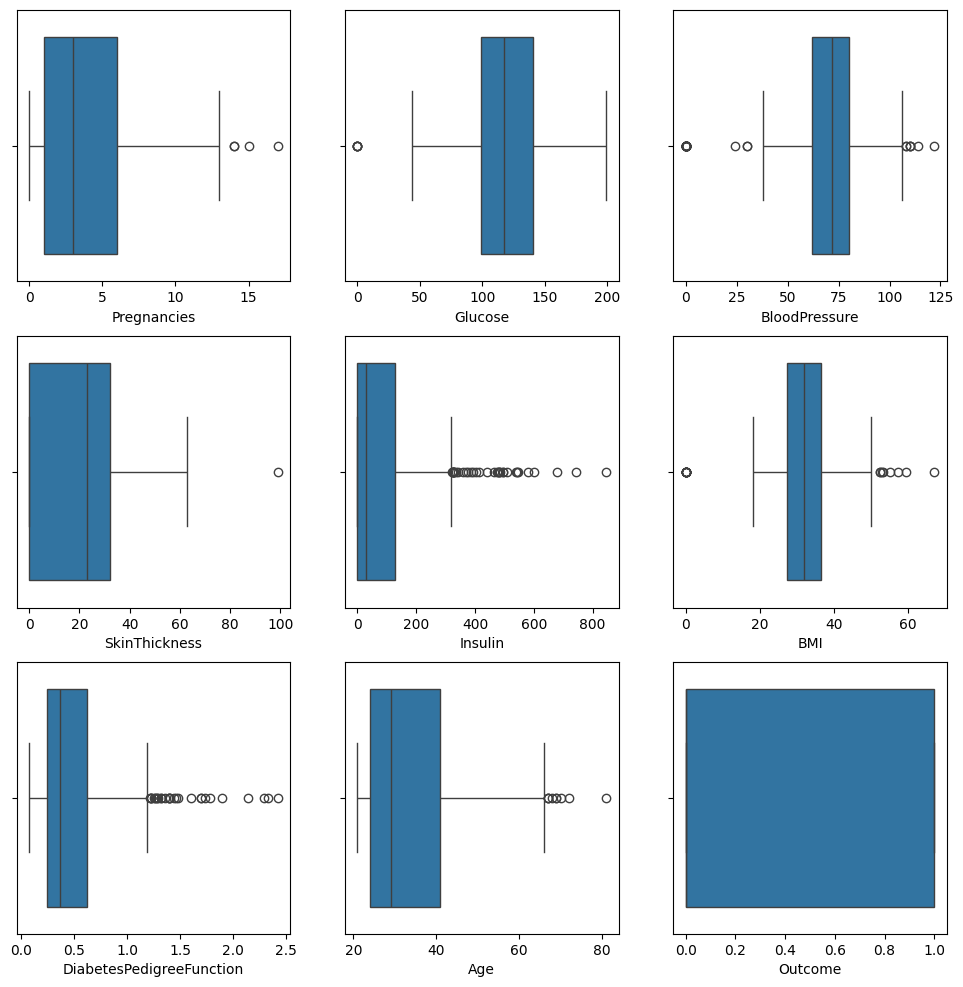

In [85]:
plt.figure(figsize=(12,12))
for i, col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=col, data=data)

plt.show()

In [86]:
# From the above boxplot it is clear that there are some outliers which are indicated with small circles

In [87]:
# Lets check which columns have outliers
for feature in data:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    if data[(data[feature]>upper)].any(axis=None):
        print(feature,"YES")
    else:
        print(feature,"NO")


Pregnancies YES
Glucose NO
BloodPressure YES
SkinThickness YES
Insulin YES
BMI YES
DiabetesPedigreeFunction YES
Age YES
Outcome NO


In [88]:
# Fixing the outliers
for feature in data:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data.loc[data[feature]>upper,feature] = upper   

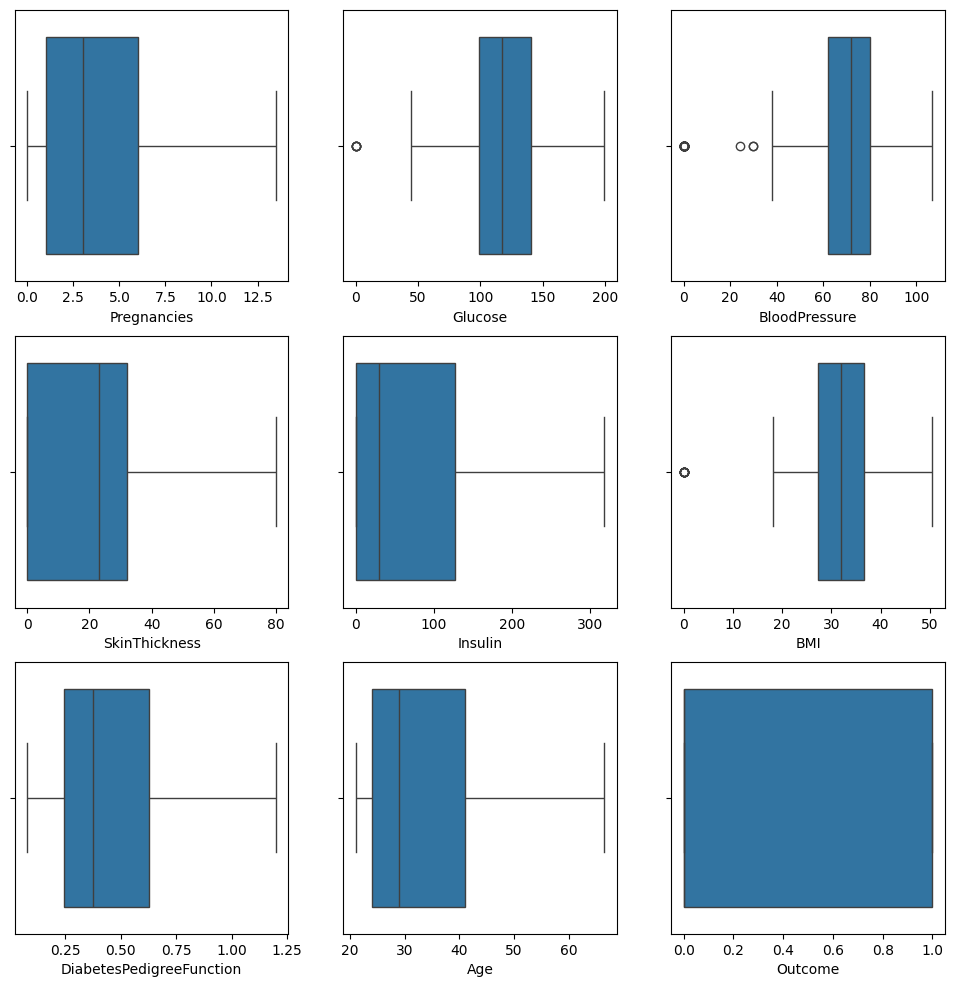

In [89]:
plt.figure(figsize=(12,12))
for i, col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age','Outcome']):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=col, data=data)

plt.show()

In [90]:
# The above boxlots shows the removal of Outliers

    Pair Plot

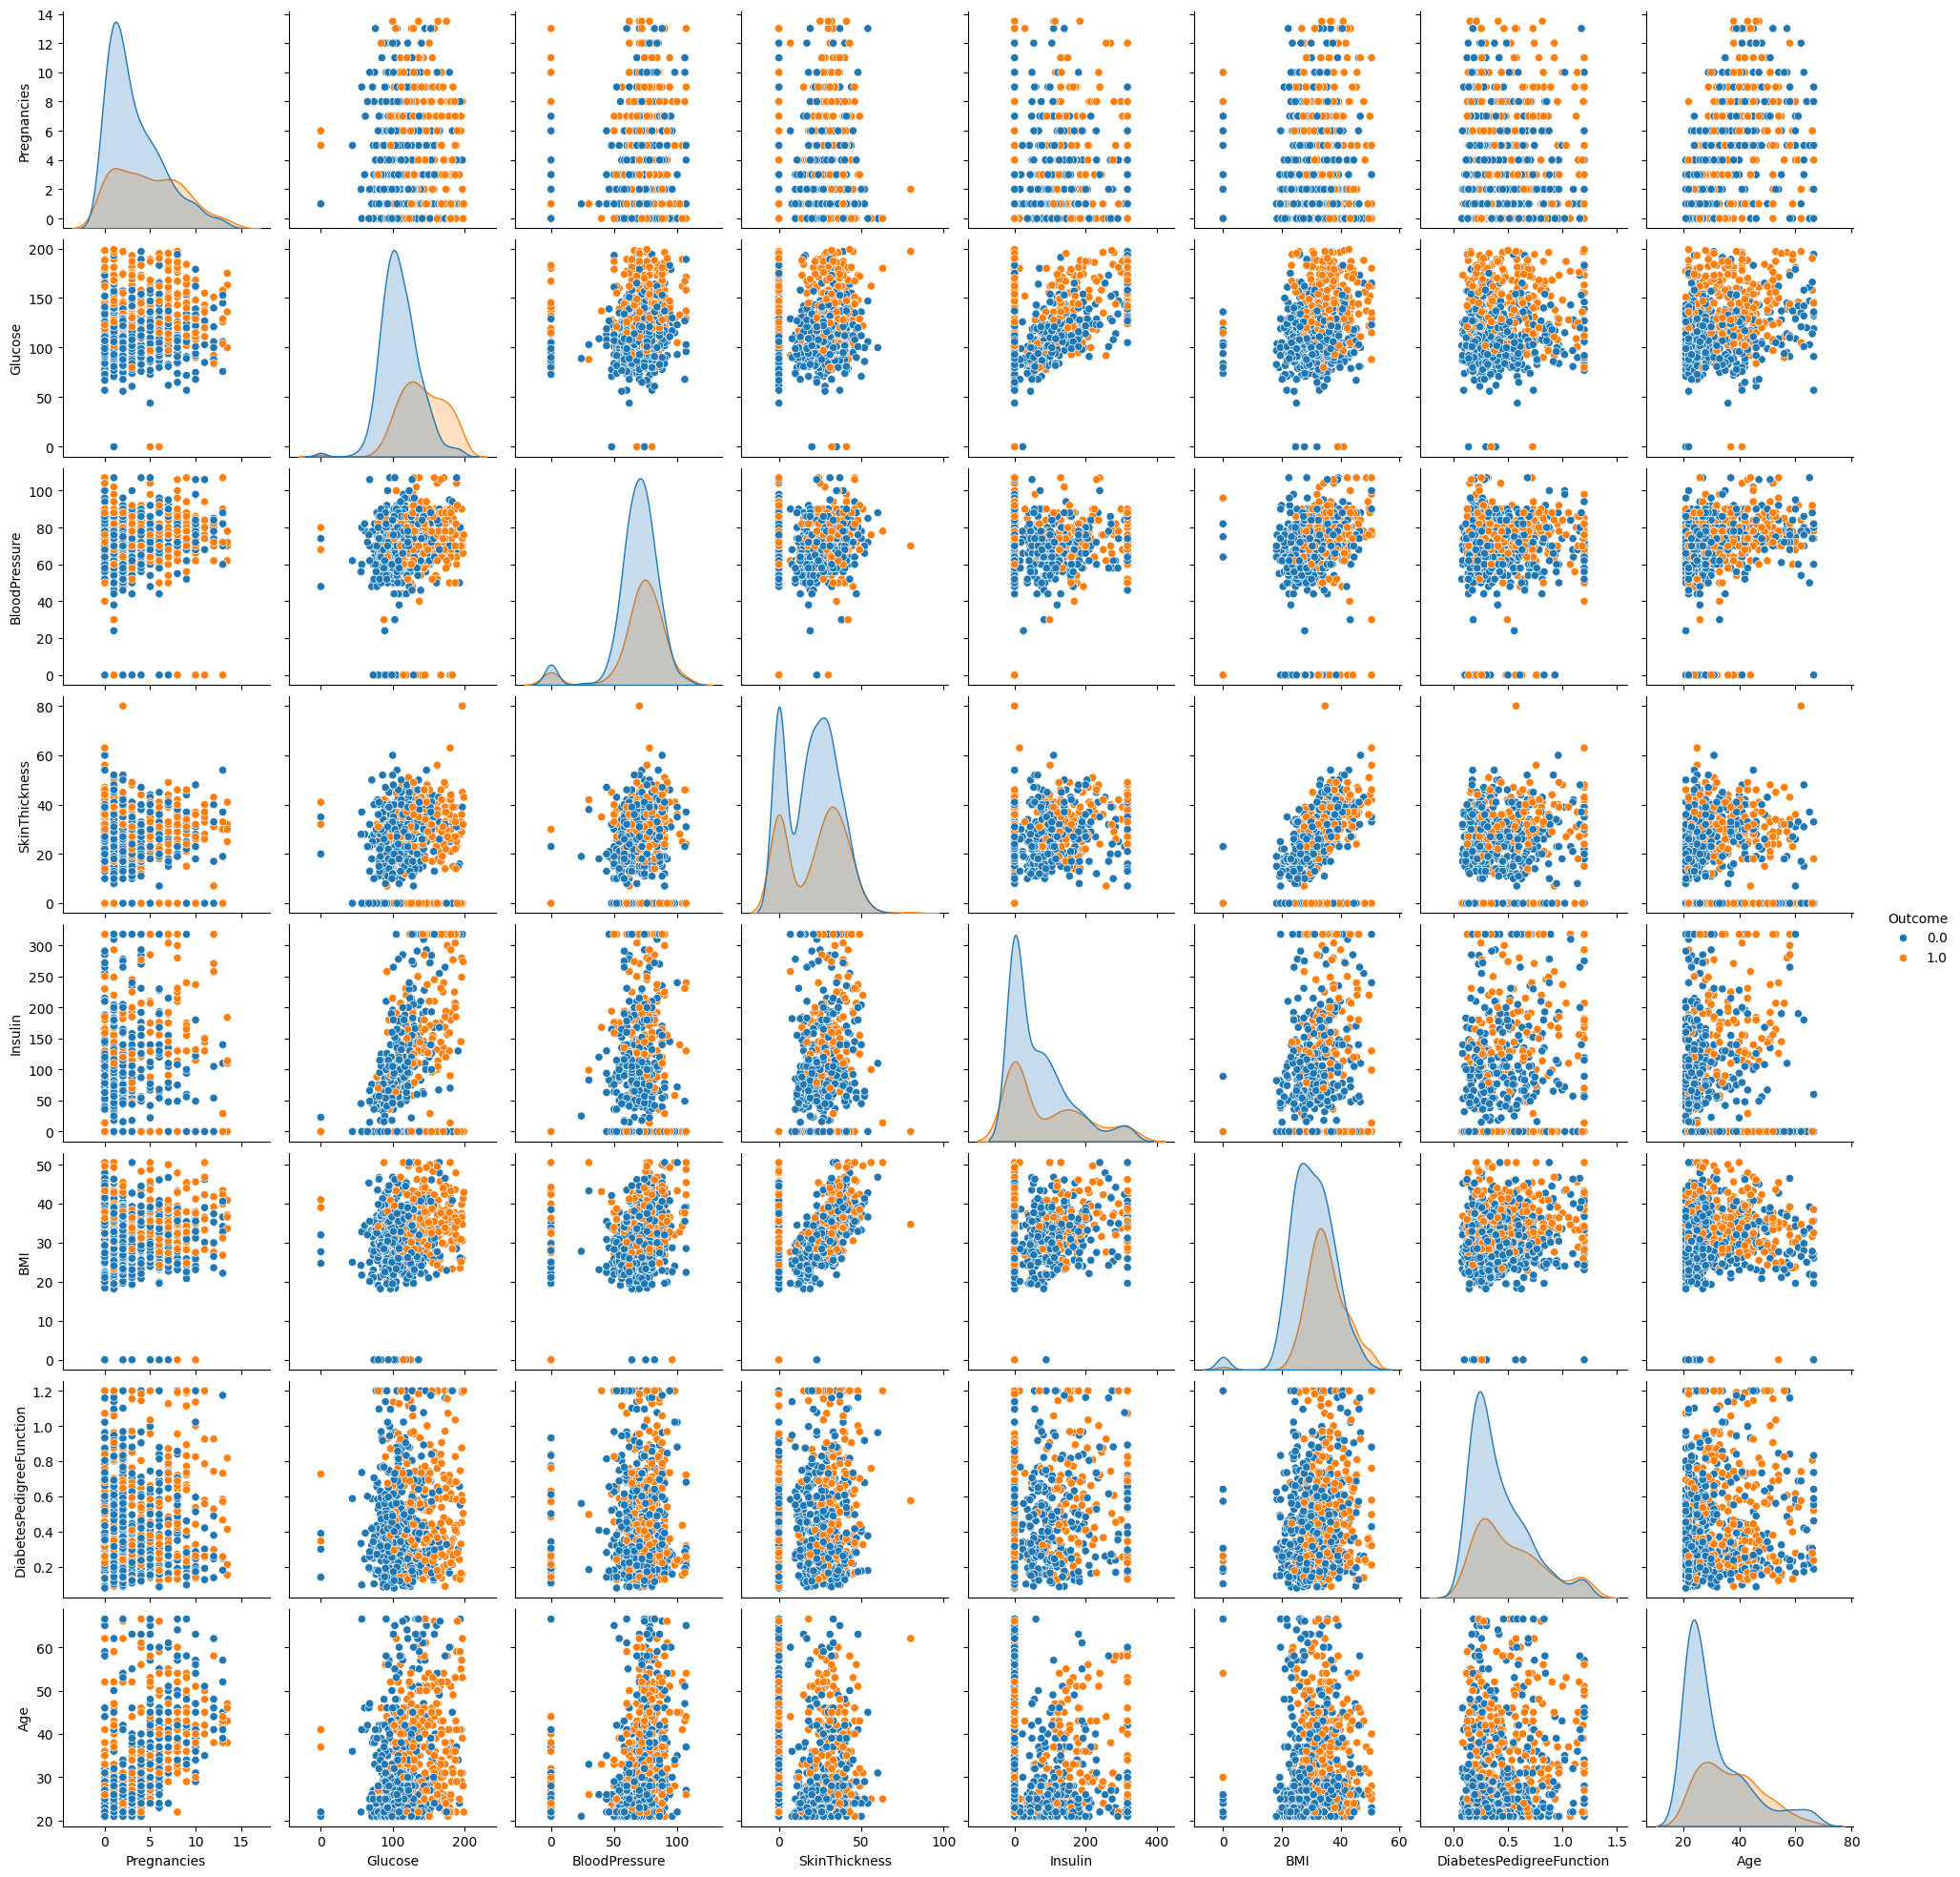

In [91]:
sns.pairplot(data, hue='Outcome')
plt.show()

    Hist Plot

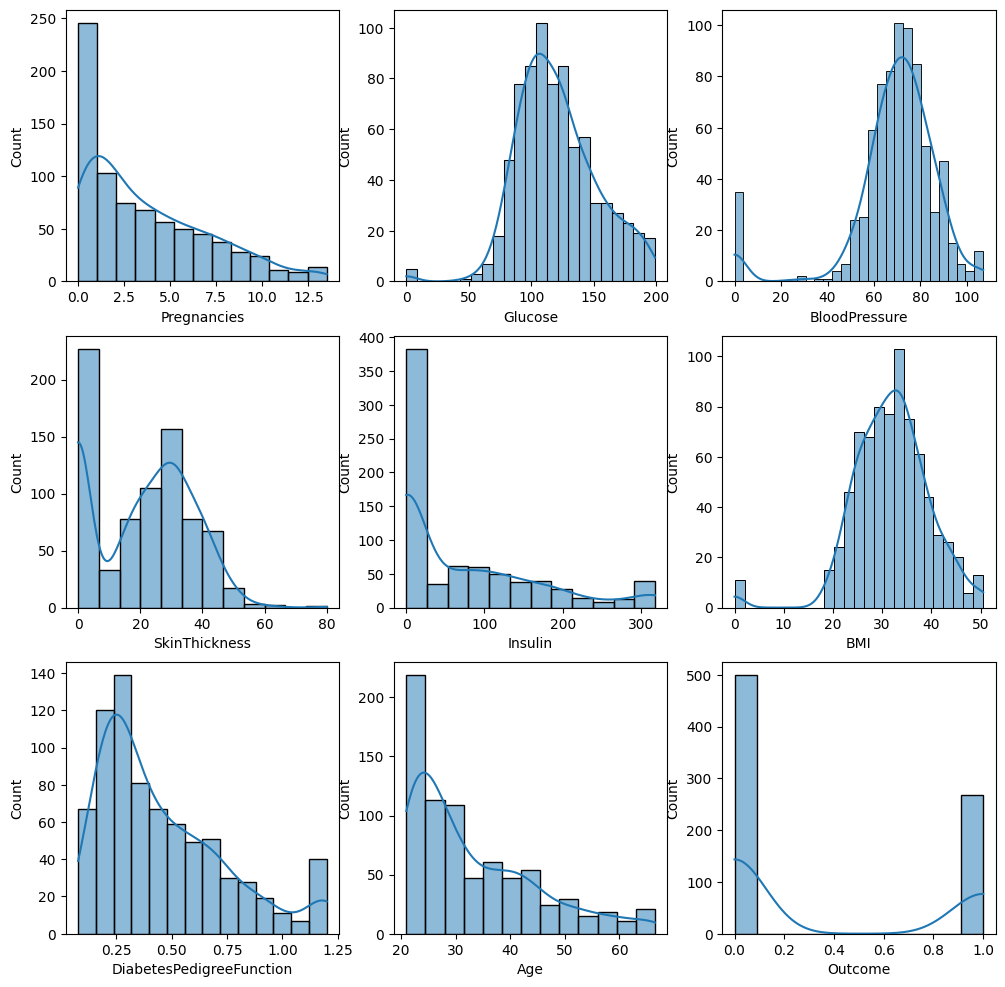

In [92]:
plt.figure(figsize=(12,12))
for i, col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']):
    plt.subplot(3,3,i+1)
    sns.histplot(x = col, data = data, kde = True)

plt.show()

    Heat Map

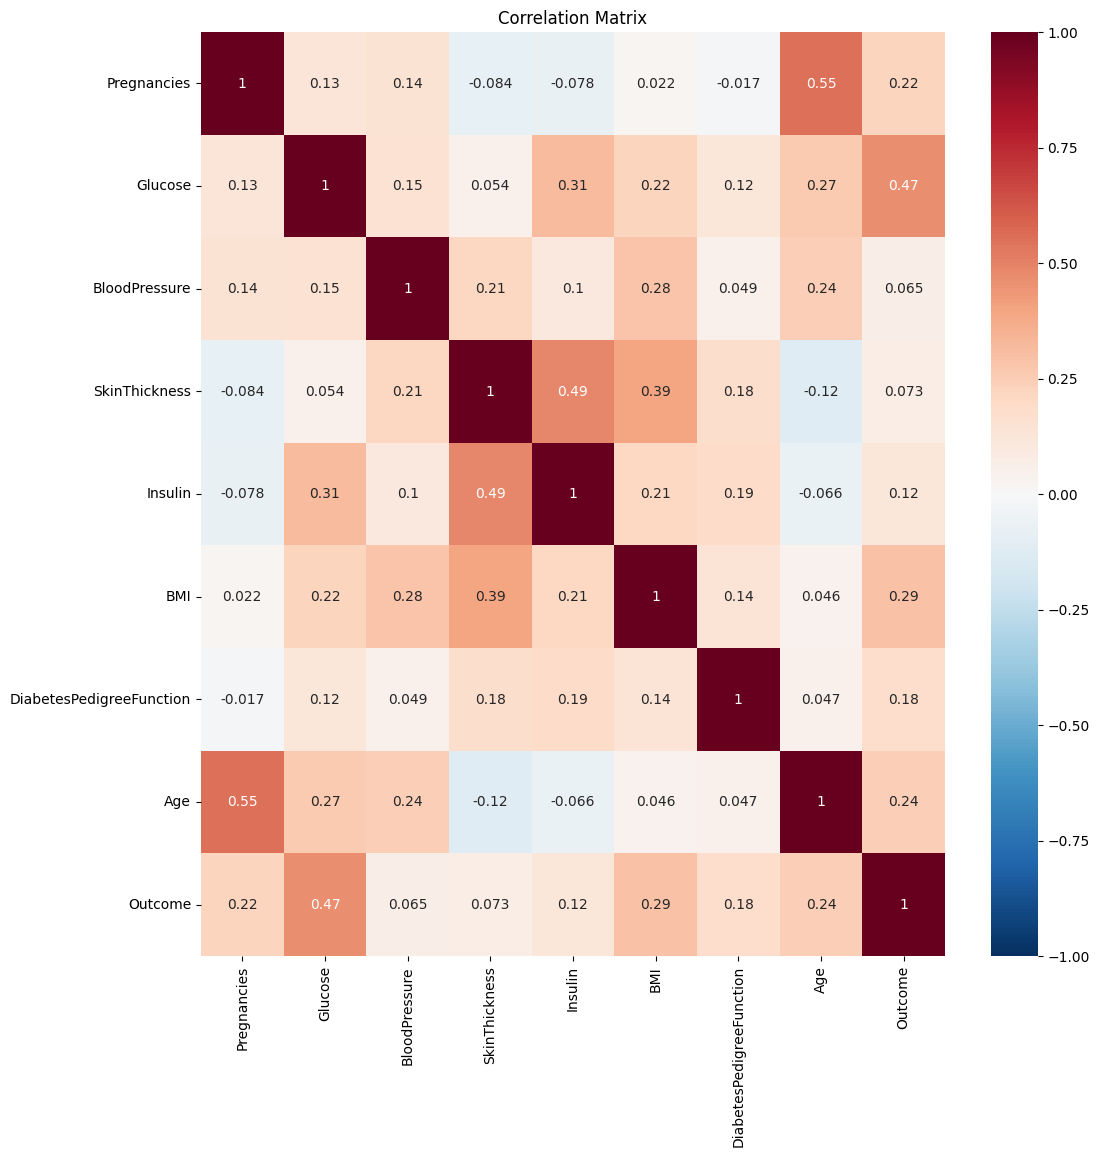

In [93]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), vmin = -1,center = 0, cmap = 'RdBu_r',annot = True)
plt.title("Correlation Matrix")
plt.show()

    Creating some extra features

In [94]:
# Feature Engineering

# Creating new feature for BMI "NewBMI"

NewBMI = pd.Series(["Underweight","Normal","Overweight","Obesity class I","Obesity class II","Obesity class III"], dtype = "category")

In [95]:
NewBMI

0          Underweight
1               Normal
2           Overweight
3      Obesity class I
4     Obesity class II
5    Obesity class III
dtype: category
Categories (6, object): ['Normal', 'Obesity class I', 'Obesity class II', 'Obesity class III', 'Overweight', 'Underweight']

In [96]:
data["NewBMI"] = NewBMI
data.loc[data["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
data.loc[(data["BMI"] > 18.5) & (data["BMI"] <= 24.9) , "NewBMI"] = NewBMI[1]
data.loc[(data["BMI"] > 24.9) & (data["BMI"] <= 29.9) , "NewBMI"] = NewBMI[2]
data.loc[(data["BMI"] > 29.9) & (data["BMI"] <= 34.9) , "NewBMI"] = NewBMI[3]
data.loc[(data["BMI"] > 34.9) & (data["BMI"] <= 39.9) , "NewBMI"] = NewBMI[4]
data.loc[data["BMI"] > 39.9, "NewBMI"] = NewBMI[5]


In [97]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6.0,148.0,72,35,0.0,33.6,0.627,50.0,1.0,Obesity class I
1,1.0,85.0,66,29,0.0,26.6,0.351,31.0,0.0,Overweight
2,8.0,183.0,64,0,0.0,23.3,0.672,32.0,1.0,Normal
3,1.0,89.0,66,23,94.0,28.1,0.167,21.0,0.0,Overweight
4,0.0,137.0,40,35,168.0,43.1,1.200,33.0,1.0,Obesity class III


In [98]:
# Creating new feature for insulin 

#if 16 <= insulin <= 166 {Normal}
#else {Abnormal}

def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [99]:
data = data.assign(NewInsulin = data.apply(set_insulin, axis = 1))

In [100]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulin
0,6.0,148.0,72,35,0.0,33.6,0.627,50.0,1.0,Obesity class I,Abnormal
1,1.0,85.0,66,29,0.0,26.6,0.351,31.0,0.0,Overweight,Abnormal
2,8.0,183.0,64,0,0.0,23.3,0.672,32.0,1.0,Normal,Abnormal
3,1.0,89.0,66,23,94.0,28.1,0.167,21.0,0.0,Overweight,Normal
4,0.0,137.0,40,35,168.0,43.1,1.200,33.0,1.0,Obesity class III,Abnormal


In [101]:
# Creating new feature for Glucose

NewGlucose = pd.Series(["Low","Normal","Pre_diabetes","High"], dtype="category")
data["NewGlucose"] = NewGlucose
data.loc[data["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
data.loc[(data["Glucose"] > 70) & data["Glucose"] <= 99, "NewGlucose"] = NewGlucose[1]
data.loc[(data["Glucose"] > 99) & data["Glucose"] <= 126, "NewGlucose"] = NewGlucose[2]
data.loc[data["Glucose"] > 126, "NewGlucose"] = NewGlucose[3]


In [102]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulin,NewGlucose
0,6.0,148.0,72,35,0.0,33.6,0.627,50.0,1.0,Obesity class I,Abnormal,High
1,1.0,85.0,66,29,0.0,26.6,0.351,31.0,0.0,Overweight,Abnormal,Pre_diabetes
2,8.0,183.0,64,0,0.0,23.3,0.672,32.0,1.0,Normal,Abnormal,High
3,1.0,89.0,66,23,94.0,28.1,0.167,21.0,0.0,Overweight,Normal,Pre_diabetes
4,0.0,137.0,40,35,168.0,43.1,1.200,33.0,1.0,Obesity class III,Abnormal,High


In [103]:
# One Hot Encoding (Handling Categorical Variables)
data = pd.get_dummies(data, columns=["NewBMI", "NewInsulin", "NewGlucose"], drop_first=True)

# Convert only the newly created dummy columns (True/False) to integers (1/0)
# Select only columns with 'bool' dtype (True/False) and convert them
bool_columns = data.select_dtypes(include='bool').columns
data[bool_columns] = data[bool_columns].astype(int)

# View the result
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity class I,NewBMI_Obesity class II,NewBMI_Obesity class III,NewBMI_Overweight,NewBMI_Underweight,NewInsulin_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Pre_diabetes
0,6.0,148.0,72,35,0.0,33.6,0.627,50.0,1.0,1,0,0,0,0,0,0,0,0
1,1.0,85.0,66,29,0.0,26.6,0.351,31.0,0.0,0,0,0,1,0,0,0,0,1
2,8.0,183.0,64,0,0.0,23.3,0.672,32.0,1.0,0,0,0,0,0,0,0,0,0
3,1.0,89.0,66,23,94.0,28.1,0.167,21.0,0.0,0,0,0,1,0,1,0,0,1
4,0.0,137.0,40,35,168.0,43.1,1.200,33.0,1.0,0,0,1,0,0,0,0,0,0


In [104]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome',
       'NewBMI_Obesity class I', 'NewBMI_Obesity class II',
       'NewBMI_Obesity class III', 'NewBMI_Overweight', 'NewBMI_Underweight',
       'NewInsulin_Normal', 'NewGlucose_Low', 'NewGlucose_Normal',
       'NewGlucose_Pre_diabetes'],
      dtype='object')

In [127]:
# Copying the data into a new_data
new_data = data.copy()

In [128]:
new_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity class I,NewBMI_Obesity class II,NewBMI_Obesity class III,NewBMI_Overweight,NewBMI_Underweight,NewInsulin_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Pre_diabetes
0,6.0,148.0,72,35,0.0,33.6,0.627,50.0,1.0,1,0,0,0,0,0,0,0,0
1,1.0,85.0,66,29,0.0,26.6,0.351,31.0,0.0,0,0,0,1,0,0,0,0,1
2,8.0,183.0,64,0,0.0,23.3,0.672,32.0,1.0,0,0,0,0,0,0,0,0,0
3,1.0,89.0,66,23,94.0,28.1,0.167,21.0,0.0,0,0,0,1,0,1,0,0,1
4,0.0,137.0,40,35,168.0,43.1,1.200,33.0,1.0,0,0,1,0,0,0,0,0,0


In [129]:
# Converting clean data into a csv file format
new_data.to_csv('cleaned_data.csv', index=False)

In [105]:
categorical_data = data[['NewBMI_Obesity class I', 'NewBMI_Obesity class II',
       'NewBMI_Obesity class III', 'NewBMI_Overweight', 'NewBMI_Underweight',
       'NewInsulin_Normal', 'NewGlucose_Low', 'NewGlucose_Normal',
       'NewGlucose_Pre_diabetes']]

In [106]:
categorical_data.head()

,NewBMI_Obesity class I,NewBMI_Obesity class II,NewBMI_Obesity class III,NewBMI_Overweight,NewBMI_Underweight,NewInsulin_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Pre_diabetes
0,1,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,1
4,0,0,1,0,0,0,0,0,0


In [118]:
y = data['Outcome']
X = data.drop(['Outcome','NewBMI_Obesity class I', 'NewBMI_Obesity class II',
       'NewBMI_Obesity class III', 'NewBMI_Overweight', 'NewBMI_Underweight',
       'NewInsulin_Normal', 'NewGlucose_Low', 'NewGlucose_Normal',
       'NewGlucose_Pre_diabetes'],axis = 1)

In [119]:
cols = X.columns
index = X.index

In [120]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72,35,0.0,33.6,0.627,50.0
1,1.0,85.0,66,29,0.0,26.6,0.351,31.0
2,8.0,183.0,64,0,0.0,23.3,0.672,32.0
3,1.0,89.0,66,23,94.0,28.1,0.167,21.0
4,0.0,137.0,40,35,168.0,43.1,1.200,33.0


In [121]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
X = rs.fit_transform(X)
X = pd.DataFrame(X,columns=cols,index=index)

In [122]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.751515,0.000000,0.37500,-0.239686,0.172043,0.665359,1.235294
1,-0.4,-0.775758,-0.333333,0.18750,-0.239686,-0.580645,-0.056209,0.117647
2,1.0,1.600000,-0.444444,-0.71875,-0.239686,-0.935484,0.783007,0.176471
3,-0.4,-0.678788,-0.333333,0.00000,0.499018,-0.419355,-0.537255,-0.470588
4,-0.6,0.484848,-1.777778,0.37500,1.080550,1.193548,2.163399,0.235294


In [123]:
X = pd.concat([X, categorical_data], axis = 1)

In [124]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity class I,NewBMI_Obesity class II,NewBMI_Obesity class III,NewBMI_Overweight,NewBMI_Underweight,NewInsulin_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Pre_diabetes
0,0.6,0.751515,0.000000,0.37500,-0.239686,0.172043,0.665359,1.235294,1,0,0,0,0,0,0,0,0
1,-0.4,-0.775758,-0.333333,0.18750,-0.239686,-0.580645,-0.056209,0.117647,0,0,0,1,0,0,0,0,1
2,1.0,1.600000,-0.444444,-0.71875,-0.239686,-0.935484,0.783007,0.176471,0,0,0,0,0,0,0,0,0
3,-0.4,-0.678788,-0.333333,0.00000,0.499018,-0.419355,-0.537255,-0.470588,0,0,0,1,0,1,0,0,1
4,-0.6,0.484848,-1.777778,0.37500,1.080550,1.193548,2.163399,0.235294,0,0,1,0,0,0,0,0,0
